# Gorjetas hard fuzzy

**Antecedentes (entradas)**

Serviço: que nota você daria para o serviço, em uma escala de 0 a 10?
- ruim, aceitável, ótimo

Qualidade da comida: quão boa estava a comida, em uma escala de 0 a 10?
- ruim, boa, saborosa

**Consequentes (saídas)**

Gorjeta: quanta gorjeta você daria, entre 0% e 20%?
- baixa, média, alta

Regras
- Se a qualidade da comida for *ruim* ou o serviço for *ruim* então a gorjeta será *baixa*
- Se o serviço for *médio* então a gorjeta será *média*
- Se o serviço for *bom* e a qualidade da comida for *saborosa* então a gorjeta será *alta*


I - Modela entradas subjetivas com conjuntos fuzzy.
II - Avalia essas entradas via regras fuzzy.
III - Combina os resultados (agregação).
IV - Converte a saída fuzzy em um valor único (defuzzificação).

# Parte inicial

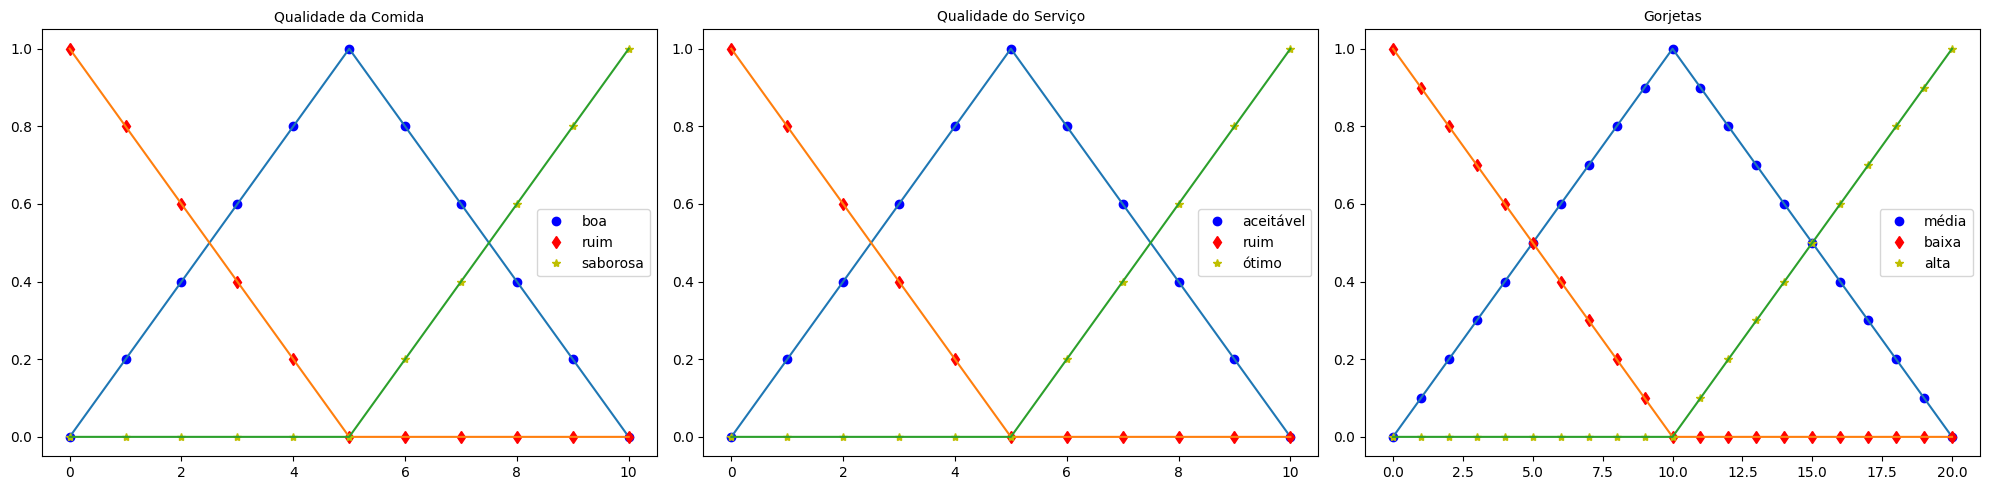

In [1]:
# faça pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Antecedentes e Consequentes:
x_comida = np.arange(0, 11, 1) # Antecedente 1
x_servico = np.arange(0, 11, 1) # Antecedente 2
x_gorjeta = np.arange(0, 21, 1) # Consequente

# QUALIDADE DA COMIDA:
y_comida_ruim = fuzz.trimf(x_comida, [0, 0, 5])
y_comida_boa = fuzz.trimf(x_comida, [0, 5, 10])
y_comida_saborosa = fuzz.trimf(x_comida, [5, 10, 10])

# QUALIDADE DO SERVIÇO:
y_servico_ruim = fuzz.trimf(x_servico, [0, 0, 5])
y_servico_aceitavel = fuzz.trimf(x_servico, [0, 5, 10])
y_servico_otimo = fuzz.trimf(x_servico, [5, 10, 10])

# GORJETA:
y_gorjeta_baixa = fuzz.trimf(x_gorjeta, [0, 0, 10])
y_gorjeta_media = fuzz.trimf(x_gorjeta, [0, 10, 20])
y_gorjeta_alta = fuzz.trimf(x_gorjeta, [10, 20, 20])

# --- 2. GRÁFICOS EM 1 LINHA COM 3 COLUNAS ---
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# Gráfico 1: Qualidade da Comida
axs[0].plot(x_comida, y_comida_boa, 'bo', label='boa')
axs[0].plot(x_comida, y_comida_boa)
axs[0].plot(x_comida, y_comida_ruim, 'rd', label='ruim')
axs[0].plot(x_comida, y_comida_ruim)
axs[0].plot(x_comida, y_comida_saborosa, 'y*', label='saborosa')
axs[0].plot(x_comida, y_comida_saborosa)
axs[0].set_title('Qualidade da Comida', fontsize=10)
axs[0].legend()

# Gráfico 2: Qualidade do Serviço
axs[1].plot(x_servico, y_servico_aceitavel, 'bo', label='aceitável')
axs[1].plot(x_servico, y_servico_aceitavel)
axs[1].plot(x_servico, y_servico_ruim, 'rd', label='ruim')
axs[1].plot(x_servico, y_servico_ruim)
axs[1].plot(x_servico, y_servico_otimo, 'y*', label='ótimo')
axs[1].plot(x_servico, y_servico_otimo)
axs[1].set_title('Qualidade do Serviço', fontsize=10)
axs[1].legend()

# Gráfico 3: Gorjeta
axs[2].plot(x_gorjeta, y_gorjeta_media, 'bo', label='média')
axs[2].plot(x_gorjeta, y_gorjeta_media)
axs[2].plot(x_gorjeta, y_gorjeta_baixa, 'rd', label='baixa')
axs[2].plot(x_gorjeta, y_gorjeta_baixa)
axs[2].plot(x_gorjeta, y_gorjeta_alta, 'y*', label='alta')
axs[2].plot(x_gorjeta, y_gorjeta_alta)
axs[2].set_title('Gorjetas', fontsize=10)
axs[2].legend()

plt.tight_layout()
plt.show()

# Entradas (inputs)

0.0 1.0 0.0
0.4 0.6 0.0


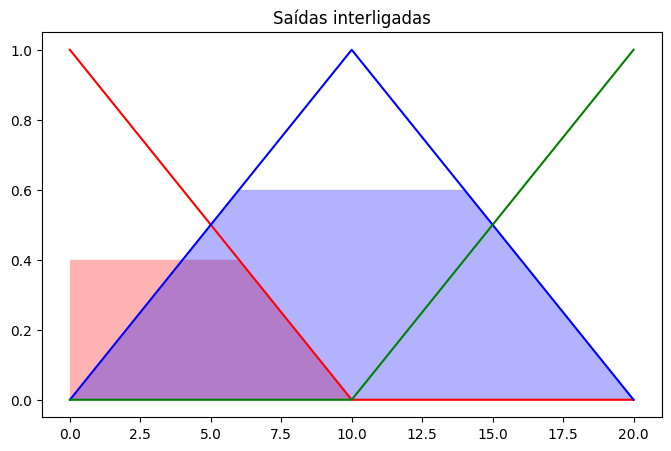

In [2]:
# ----------------------------
# FUNÇÃO DE MÉTRICA
# ----------------------------

def metrica(numero_comida, numero_servico):
    # Aqui usamos a inferência fuzzy para calcular o grau de pertinência
    # do valor de entrada da comida (numero_comida) para cada conjunto fuzzy: ruim, boa, saborosa.
    comida_nivel_ruim = fuzz.interp_membership(x_comida, y_comida_ruim, numero_comida)
    comida_nivel_boa = fuzz.interp_membership(x_comida, y_comida_boa, numero_comida)
    comida_nivel_saborosa = fuzz.interp_membership(x_comida, y_comida_saborosa, numero_comida)

    # Da mesma forma, calculamos o grau de pertinência do valor de entrada do serviço (numero_servico)
    # para cada conjunto fuzzy: ruim, aceitável, ótimo.
    servico_nivel_ruim = fuzz.interp_membership(x_servico, y_servico_ruim, numero_servico)
    servico_nivel_aceitavel = fuzz.interp_membership(x_servico, y_servico_aceitavel, numero_servico)
    servico_nivel_otimo = fuzz.interp_membership(x_servico, y_servico_otimo, numero_servico)

    # Exibe os graus de pertinência calculados para cada entrada.
    print(comida_nivel_ruim, comida_nivel_boa, comida_nivel_saborosa)
    print(servico_nivel_ruim, servico_nivel_aceitavel, servico_nivel_otimo)

    # Retorna todos os valores para uso posterior.
    return (comida_nivel_ruim, comida_nivel_boa, comida_nivel_saborosa, servico_nivel_ruim, servico_nivel_aceitavel, servico_nivel_otimo)


# Aqui chamamos a função passando valores específicos para comida e serviço.
# Assim obtemos o grau de pertinência de cada classificação para estas entradas.
comida_nivel_ruim, comida_nivel_boa, comida_nivel_saborosa, servico_nivel_ruim, servico_nivel_aceitavel, servico_nivel_otimo = metrica(5, 3)

# ----------------------------
# INFERÊNCIA FUZZY (REGRAS)
# ----------------------------

# REGRA 1:
# Se a comida for ruim OU o serviço for ruim → gorjeta baixa.
ativacao_regra1 = np.fmax(comida_nivel_ruim, servico_nivel_ruim) # fmax = união fuzzy (OR); fmin = interseção fuzzy (AND).
ativacao_gorjeta_baixa = np.fmin(ativacao_regra1, y_gorjeta_baixa)

# REGRA 2:
# Se o serviço for aceitável → gorjeta média.
ativacao_gorjeta_media = np.fmin(servico_nivel_aceitavel, y_gorjeta_media)
# Aqui não precisa fmax porque é uma única condição.

# REGRA 3:
# Se o serviço for ótimo OU a comida for saborosa → gorjeta alta.
ativacao_regra3 = np.fmax(servico_nivel_otimo, comida_nivel_saborosa)
ativacao_gorjeta_alta = np.fmin(ativacao_regra3, y_gorjeta_alta)

# ----------------------------
# VISUALIZAÇÃO DAS SAÍDAS ATIVADAS
# ----------------------------

# Cria um vetor de zeros para servir de base para o preenchimento.
x_gorjeta0 = np.zeros_like(x_gorjeta)
# Cria o gráfico mostrando as regiões ativadas para cada regra.
fig, ax = plt.subplots(figsize=(8, 5))
# Área de gorjeta baixa: preenchimento vermelho claro com transparência.
ax.fill_between(x_gorjeta, x_gorjeta0, ativacao_gorjeta_baixa, facecolor='red', alpha=0.3)
ax.plot(x_gorjeta, y_gorjeta_baixa, color='red')
# Área de gorjeta média: preenchimento azul claro com transparência.
ax.fill_between(x_gorjeta, x_gorjeta0, ativacao_gorjeta_media, facecolor='blue', alpha=0.3)
ax.plot(x_gorjeta, y_gorjeta_media, color='blue')
# Área de gorjeta alta: preenchimento verde claro com transparência.
ax.fill_between(x_gorjeta, x_gorjeta0, ativacao_gorjeta_alta, facecolor='green', alpha=0.3)
ax.plot(x_gorjeta, y_gorjeta_alta, color='green')
ax.set_title('Saídas interligadas') # Título do gráfico.
plt.show()

# Defuzzificação

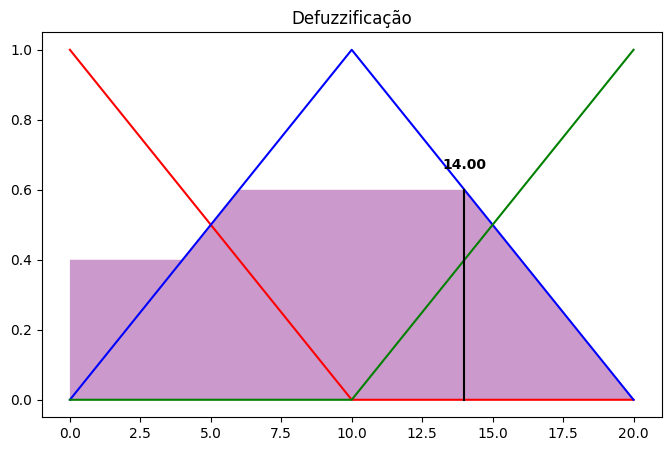

In [3]:
# ----------------------------
# AGREGAÇÃO DAS SAÍDAS ATIVADAS
# ----------------------------

# Combina as três saídas fuzzy (baixa, média, alta) em uma única função de controle.
# np.fmax faz a união fuzzy entre as ativações: significa "OU" para conjuntos fuzzy.
controle = np.fmax(ativacao_gorjeta_baixa, np.fmax(ativacao_gorjeta_media, ativacao_gorjeta_alta))

# ----------------------------
# DEFUZZIFICAÇÃO
# ----------------------------

# A defuzzificação transforma a função fuzzy de controle em um único valor numérico.
# Existem vários métodos:
# - 'centroid': centro de gravidade do conjunto (média ponderada)
# - 'bisector': ponto que divide a área em duas iguais
# - 'mom': média dos máximos
# - 'som': menor valor do máximo
# - 'lom': maior valor do máximo
# Aqui você escolheu 'lom' (Last of Maximum): retorna o maior valor que atinge o máximo.
gorjeta = fuzz.defuzz(x_gorjeta, controle, 'lom')

# Calcula o grau de pertinência da gorjeta final dentro da função de controle.
gorjeta_ativacao = fuzz.interp_membership(x_gorjeta, controle, gorjeta)

# ----------------------------
# VISUALIZAÇÃO DA DEFUZZIFICAÇÃO
# ----------------------------

fig, ax = plt.subplots(figsize=(8,5))
# Plota os conjuntos fuzzy originais: baixa (azul), média (verde), alta (vermelha)
ax.plot(x_gorjeta, y_gorjeta_baixa, 'r')
ax.plot(x_gorjeta, y_gorjeta_media, 'b')
ax.plot(x_gorjeta, y_gorjeta_alta, 'g')
ax.fill_between(x_gorjeta, x_gorjeta0, controle, facecolor='purple', alpha=0.4) # Plota a área agregada (função de controle resultante), preenchida de roxo.
# indicando a solução numérica extraída do conjunto fuzzy.
ax.plot([gorjeta, gorjeta], [0, gorjeta_ativacao], 'black') # Desenha uma linha vertical preta na posição do valor defuzzificado (gorjeta final)
# Escreve o valor da gorjeta próximo da linha preta
ax.text(gorjeta, gorjeta_ativacao + 0.05, f'{gorjeta:.2f}', ha='center', va='bottom', fontsize=10, color='black', weight='bold')
# Título do gráfico.
ax.set_title('Defuzzificação')
plt.show()

# Exemplo diferente:

c:\Users\CLIENTE\anaconda3\envs\orlando\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
c:\Users\CLIENTE\anaconda3\envs\orlando\lib\site-packages\skfuzzy\control\term.py:72: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


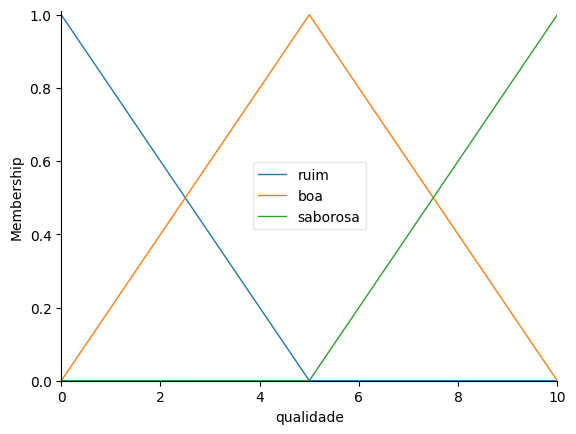

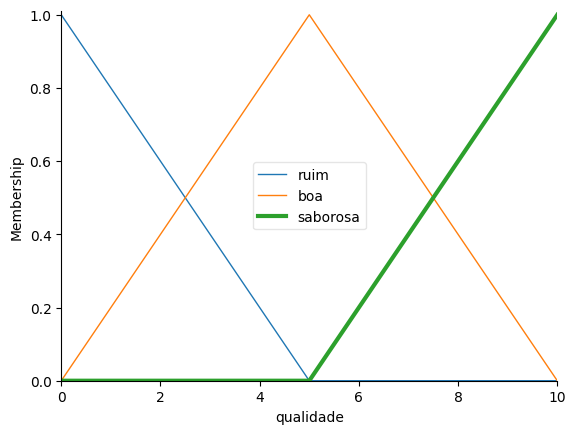

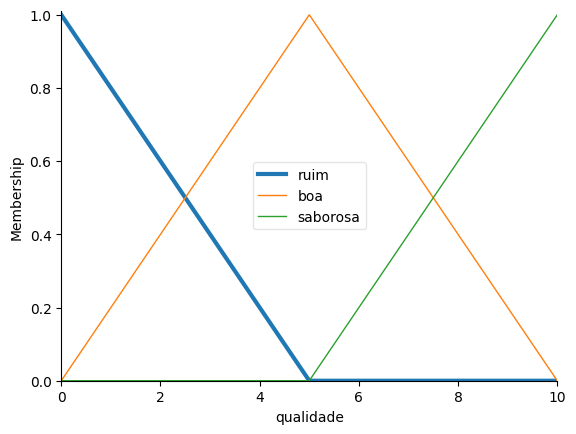

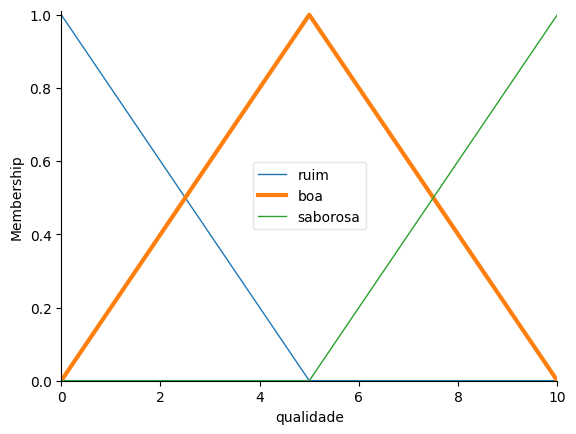

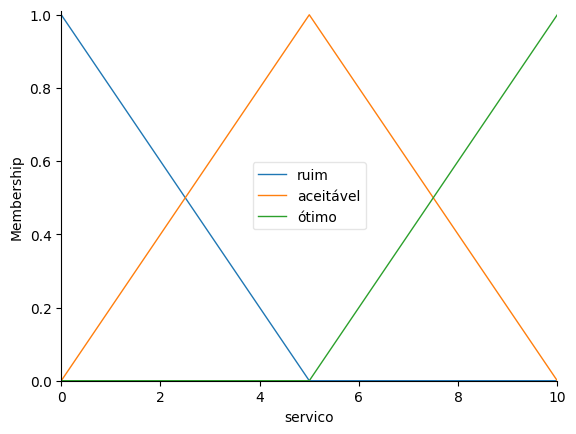

In [4]:
# ----------------------------
# IMPORTAÇÕES NECESSÁRIAS
# ----------------------------
import numpy as np               # Biblioteca para cálculos numéricos
import skfuzzy as fuzz           # Biblioteca para lógica fuzzy
from skfuzzy import control as ctrl  # Módulo de controle fuzzy para construir sistemas fuzzy completos

# ----------------------------
# DEFINIÇÃO DAS VARIÁVEIS FUZZY
# ----------------------------
qualidade = ctrl.Antecedent(np.arange(0, 11, 1), 'qualidade') # Define o Antecedent (variável de entrada) 'qualidade' e varia de 0 a 10 (inclusive) com passo 1.
servico = ctrl.Antecedent(np.arange(0, 11, 1), 'servico') # Define o Antecedent (variável de entrada) 'servico' também varia de 0 a 10.
gorjeta = ctrl.Consequent(np.arange(0, 21, 1), 'gorjeta') # Define o Consequent (variável de saída) 'gorjeta' e varia de 0 a 20.

# ----------------------------
# DEFINIÇÃO AUTOMÁTICA DOS CONJUNTOS FUZZY
# ----------------------------
qualidade.automf(number=3, names=['ruim', 'boa', 'saborosa']) # Cria automaticamente 3 conjuntos fuzzy para 'qualidade': 'ruim', 'boa' e 'saborosa'
servico.automf(number=3, names=['ruim', 'aceitável', 'ótimo']) # Cria automaticamente 3 conjuntos fuzzy para 'servico': 'ruim', 'aceitável' e 'ótimo'

# ----------------------------
# VISUALIZAÇÃO DOS CONJUNTOS FUZZY
# ----------------------------
qualidade.view() # Exibe o gráfico de todos os conjuntos fuzzy da variável 'qualidade'
qualidade['saborosa'].view() # Exibe o gráfico individual do conjunto 'saborosa' de 'qualidade'
qualidade['ruim'].view() # Exibe o gráfico individual do conjunto 'ruim' de 'qualidade'
qualidade['boa'].view() # Exibe o gráfico individual do conjunto 'boa' de 'qualidade'
servico.view() # Exibe o gráfico de todos os conjuntos fuzzy da variável 'servico'


# DEFINIÇÃO DAS FUNÇÕES DE PERTINÊNCIA DA SAÍDA

10.387559808612435


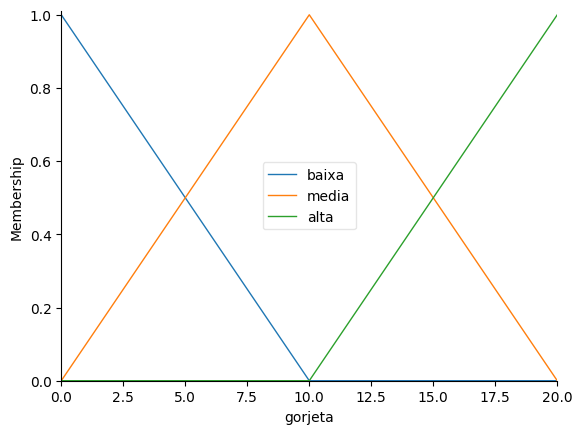

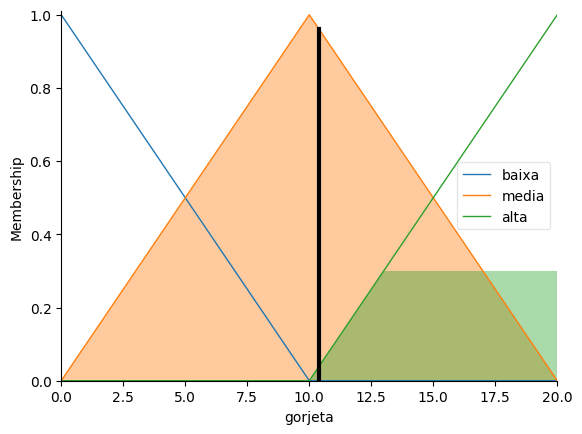

In [5]:
# Define manualmente os conjuntos fuzzy da variável de saída 'gorjeta' usando funções de pertinência triangulares (trimf).
gorjeta['baixa'] = fuzz.trimf(gorjeta.universe, [0, 0, 10]) # 'baixa': função triangular que vai de 0 até 10, com base em [0, 0, 10].
gorjeta['media'] = fuzz.trimf(gorjeta.universe, [0, 10, 20]) # 'media': função triangular centrada em 10, indo de 0 a 20, com base em [0, 10, 20].
gorjeta['alta'] = fuzz.trimf(gorjeta.universe, [10, 20, 20]) # 'alta': função triangular que vai de 10 a 20, com base em [10, 20, 20].
gorjeta.view() # Visualiza os conjuntos fuzzy definidos para a gorjeta.

# ----------------------------
# DEFINIÇÃO DAS REGRAS FUZZY
# ----------------------------
regra1 = ctrl.Rule(qualidade['ruim'] | servico['ruim'], gorjeta['baixa']) # Regra 1: SE a qualidade for ruim OU o serviço for ruim ENTÃO a gorjeta será baixa.
regra2 = ctrl.Rule(servico['aceitável'], gorjeta['media']) # Regra 2: SE o serviço for aceitável ENTÃO a gorjeta será média.
regra3 = ctrl.Rule(servico['ótimo'] | qualidade['saborosa'], gorjeta['alta']) # Regra 3: SE o serviço for ótimo OU a qualidade for saborosa ENTÃO a gorjeta será alta.

# ----------------------------
# MONTAGEM DO SISTEMA DE CONTROLE
# ----------------------------
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3]) # Cria o sistema de controle fuzzy com as três regras definidas.
sistema = ctrl.ControlSystemSimulation(sistema_controle) # Cria uma simulação do sistema para usar com entradas específicas.

# ----------------------------
# INSERÇÃO DOS VALORES DE ENTRADA
# ----------------------------
sistema.input['qualidade'] = 6.5 # Cria uma simulação do sistema para usar com entradas específicas.
sistema.input['servico'] = 5.0 # Define o valor de entrada para a variável 'servico'.
sistema.compute() # Realiza o processamento do sistema fuzzy com base nas entradas e regras.

# ----------------------------
# RESULTADO
# ----------------------------
print(sistema.output['gorjeta']) # Imprime o valor numérico defuzzificado da gorjeta calculada pelo sistema.
gorjeta.view(sim=sistema) # Mostra o gráfico da variável de saída 'gorjeta', destacando o resultado encontrado.

# DEFINIÇÃO DAS FUNÇÕES DE PERTINÊNCIA DA SAÍDA

5.662380878042331


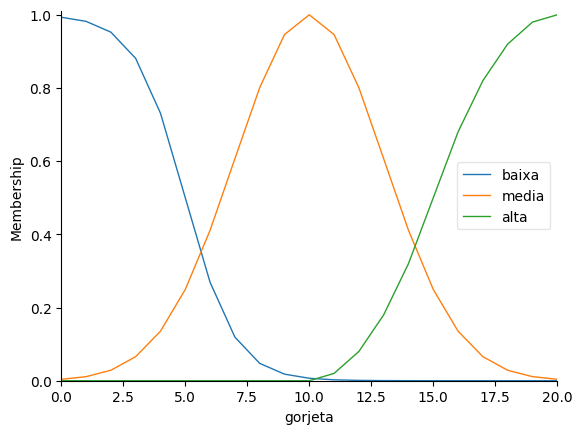

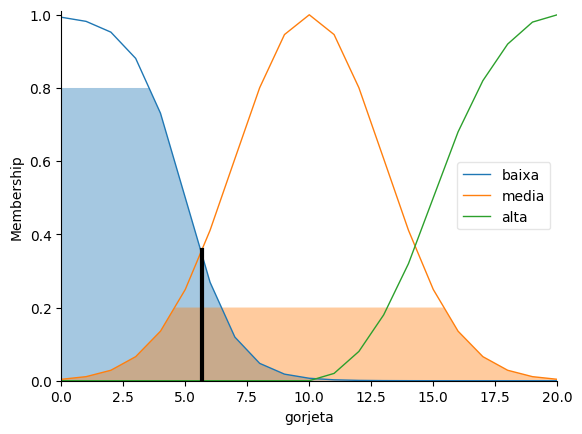

In [6]:

# Aqui, ao invés de usar apenas funções triangulares, usamos diferentes tipos de funções de pertinência e para modelar a variável de saída 'gorjeta' de forma mais flexível:
gorjeta['baixa'] = fuzz.sigmf(gorjeta.universe, 5, -1) # 'baixa': função sigmoidal decrescente (sigmf) ---> Parâmetros: centro em 5, inclinação negativa (-1) para criar uma curva que começa alta e desce.
gorjeta['media'] = fuzz.gaussmf(gorjeta.universe, 10, 3) # 'media': função Gaussiana (gaussmf) ---> Parâmetros: centro em 10, desvio padrão 3 — gera uma curva suave em forma de sino.
gorjeta['alta'] = fuzz.pimf(gorjeta.universe, 10, 20, 20, 21) # 'alta': função de forma de platô (pimf) ---> Parâmetros: transição suave entre 10 e 20, com patamar até 20~21 + Cria uma função que cresce suavemente, tem um platô e depois decresce.
gorjeta.view() # Visualiza os três conjuntos fuzzy da variável de saída 'gorjeta' com suas novas formas.

# ----------------------------
# DEFINIÇÃO DAS REGRAS FUZZY
# ----------------------------

# Mesmas regras linguísticas do exemplo anterior:
regra1 = ctrl.Rule(qualidade['ruim'] | servico['ruim'], gorjeta['baixa']) # Regra 1: SE a qualidade for ruim OU o serviço for ruim → gorjeta baixa.
regra2 = ctrl.Rule(servico['aceitável'], gorjeta['media']) # Regra 2: SE o serviço for aceitável → gorjeta média.
regra3 = ctrl.Rule(servico['ótimo'] | qualidade['saborosa'], gorjeta['alta']) # Regra 3: SE o serviço for ótimo OU a qualidade for saborosa → gorjeta alta.

# ----------------------------
# MONTAGEM DO SISTEMA DE CONTROLE
# ----------------------------
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3]) # Cria o sistema de controle com as regras definidas.
sistema = ctrl.ControlSystemSimulation(sistema_controle) # Cria uma simulação desse sistema.

# ----------------------------
# INSERÇÃO DOS VALORES DE ENTRADA
# ----------------------------
sistema.input['qualidade'] = 1 # Define um valor baixo para qualidade e serviço para testar a resposta fuzzy:
sistema.input['servico'] = 1
sistema.compute() # Calcula a saída (gorjeta) com base nas regras e nas entradas.

# ----------------------------
# RESULTADO
# ----------------------------
print(sistema.output['gorjeta']) # Imprime o valor defuzzificado final da gorjeta para os valores de entrada fornecidos.
gorjeta.view(sim=sistema) # Mostra o gráfico da variável de saída 'gorjeta', incluindo o resultado da simulação.


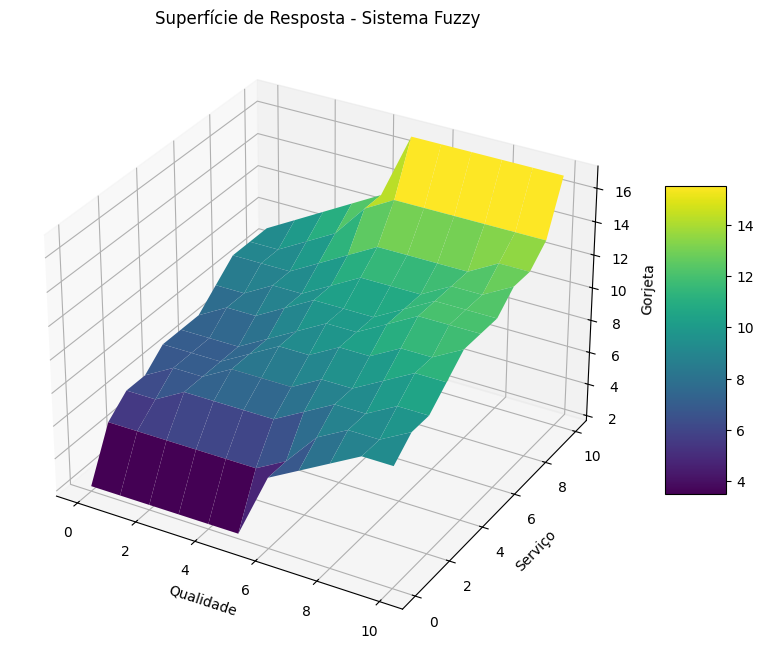

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Necessário para projeção 3D

# ----------------------------
#    CRIA MALHAS DE PONTOS PARA 'qualidade' E 'servico'
# ----------------------------
qualidade_range = np.arange(0, 11, 1) # Gera 21 pontos de 0 a 10 para cada entrada
servico_range = np.arange(0, 11, 1)
x, y = np.meshgrid(qualidade_range, servico_range) # Cria uma grade 2D combinando todos os pares possíveis de qualidade e serviço
z = np.zeros_like(x)

# ----------------------------
#    CALCULA A SAÍDA PARA CADA PONTO DA MALHA
# ----------------------------

# Para cada ponto (qualidade, serviço), calcula a gorjeta defuzzificada
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        sistema.input['qualidade'] = x[i, j]
        sistema.input['servico'] = y[i, j]
        sistema.compute()
        z[i, j] = sistema.output['gorjeta']

# ----------------------------
#   PLOTA A SUPERFÍCIE DE RESPOSTA
# ----------------------------
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, cmap='viridis', linewidth=0.5, antialiased=True) # Cria a superfície 3D
fig.colorbar(surf, shrink=0.5, aspect=5) # Adiciona barra de cores para referência
ax.set_xlabel('Qualidade')
ax.set_ylabel('Serviço')
ax.set_zlabel('Gorjeta')
ax.set_title('Superfície de Resposta - Sistema Fuzzy')
plt.show()